In [24]:
#Importing necessary libraries

from tensorflow.keras.datasets import mnist        # importing ready dataset inside of keras
from tensorflow.keras import models                # importing models module 
from tensorflow.keras import layers                # importing layers module
from tensorflow.keras.utils import to_categorical  #
from tensorflow.keras.utils import plot_model      # to show structure of model

import matplotlib.pyplot as plt


In [25]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Recognizing the data
As it can seen below, our dataset has 60000 train and ... test images. Each image has 28x28 pixels with in gray.

### --- TRAIN DATA ---

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
train_labels.shape

(60000,)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


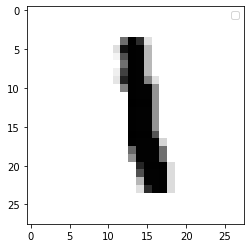

In [28]:
digit_train_set = train_images[6]
plt.imshow(digit_train_set, cmap=plt.cm.binary)
plt.legend()

### --- TEST DATA---

In [29]:
test_images.shape

(10000, 28, 28)

In [30]:
test_labels.shape

(10000,)

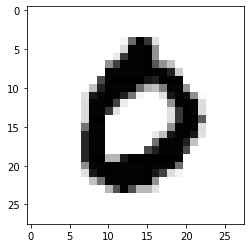

In [31]:
digit_test_set = test_images[3]
plt.imshow(digit_test_set, cmap=plt.cm.binary)
plt.show()

#### Note: A it can seen, mnist dataset has 70000 images divided into 60000 and 10000 train and test respectively. Each image represents handwriting digits by 28x28 grayscale 

### --- MODEL --- 

In this part, model is created as sequential by using some trend activation functions like relu and softmax. To gentle touch topics you can check this helpful contribution: [Activation Functions — All You Need To Know! by Sukanya Bag](https://medium.com/analytics-vidhya/activation-functions-all-you-need-to-know-355a850d025e#:~:text=The%20ReLU%20(Rectified%20Linear%20Unit,is%20no%20gradient%20saturation%20problem.)

In [32]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense( 10, activation='softmax'))

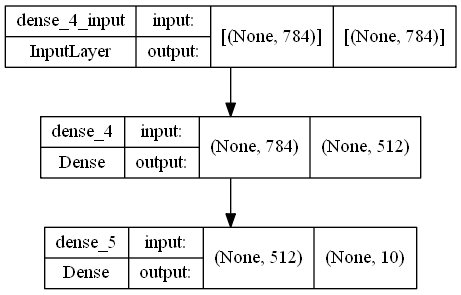

In [35]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [36]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

In [38]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [39]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [41]:
model.fit(train_images,train_labels, epochs=5, batch_size= 128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2553 - accuracy: 0.9268
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1031 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0680 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0488 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0375 - accuracy: 0.9891


In [42]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 659us/step - loss: 0.0699 - accuracy: 0.9788


In [45]:
print('Test Accuracy is: {}'.format(test_acc))

Test Accuracy is: 0.9787999987602234


### END